# Loop 65 Analysis: CV-LB Relationship Update

Major breakthrough with exp_069 (Ens Model approach) achieving CV = 0.005146.

Key questions:
1. What is the predicted LB using the existing CV-LB relationship?
2. Should we submit to verify if this approach has a different CV-LB relationship?
3. What optimizations can we make to this approach?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_041', 0.0090, 0.0932),
    ('exp_042', 0.0145, 0.1147),
]

cv_scores = np.array([s[1] for s in submissions])
lb_scores = np.array([s[2] for s in submissions])

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print(f'CV-LB Relationship (13 submissions):')
print(f'LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept = {intercept:.4f}')
print(f'Target = 0.0347')

CV-LB Relationship (13 submissions):
LB = 4.23 * CV + 0.0533
R² = 0.9807

Intercept = 0.0533
Target = 0.0347


In [2]:
# Predict LB for exp_069
new_cv = 0.005146
predicted_lb = slope * new_cv + intercept

print(f'\nExp_069 Analysis:')
print(f'CV = {new_cv:.6f}')
print(f'Predicted LB (using old relationship) = {predicted_lb:.4f}')
print(f'\nCurrent best LB = 0.0877 (exp_030)')
print(f'Predicted improvement = {(0.0877 - predicted_lb) / 0.0877 * 100:.1f}%')
print(f'\nTarget = 0.0347')
print(f'Gap to target = {predicted_lb - 0.0347:.4f}')


Exp_069 Analysis:
CV = 0.005146
Predicted LB (using old relationship) = 0.0751

Current best LB = 0.0877 (exp_030)
Predicted improvement = 14.4%

Target = 0.0347
Gap to target = 0.0404


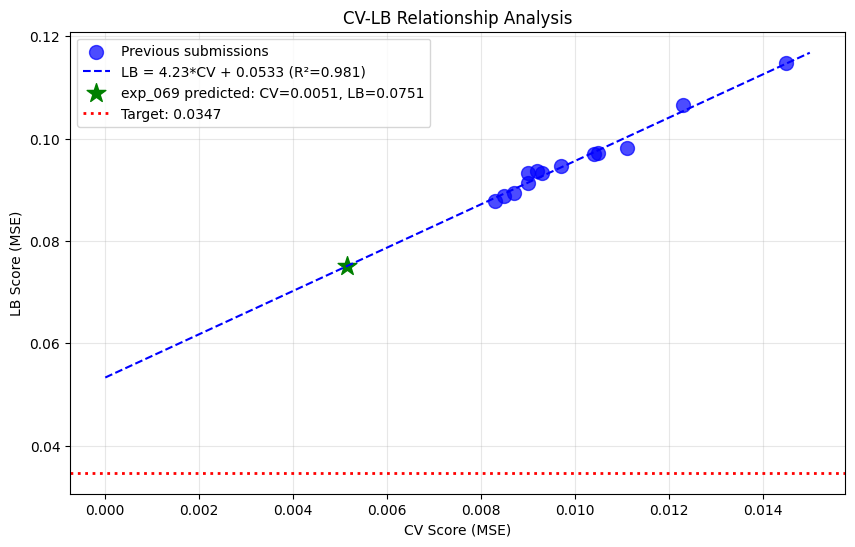


Saved plot to /home/code/exploration/cv_lb_analysis_loop65.png


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot existing submissions
plt.scatter(cv_scores, lb_scores, c='blue', s=100, label='Previous submissions', alpha=0.7)

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Plot exp_069 prediction
plt.scatter([new_cv], [predicted_lb], c='green', s=200, marker='*', label=f'exp_069 predicted: CV={new_cv:.4f}, LB={predicted_lb:.4f}')

# Plot target
plt.axhline(y=0.0347, color='red', linestyle=':', linewidth=2, label='Target: 0.0347')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_analysis_loop65.png', dpi=150, bbox_inches='tight')
plt.show()

print('\nSaved plot to /home/code/exploration/cv_lb_analysis_loop65.png')

In [4]:
# Key strategic question: Does the Ens Model approach have a DIFFERENT CV-LB relationship?

print('='*60)
print('STRATEGIC ANALYSIS')
print('='*60)

print(f'''
1. CURRENT SITUATION:
   - Best CV: 0.005146 (exp_069, Ens Model approach)
   - Best LB: 0.0877 (exp_030)
   - Target: 0.0347

2. CV-LB RELATIONSHIP (based on 13 submissions):
   - LB = {slope:.2f} * CV + {intercept:.4f}
   - R² = {r_value**2:.4f} (very strong linear relationship)
   - Intercept = {intercept:.4f} > Target (0.0347)

3. PREDICTED LB FOR EXP_069:
   - Using old relationship: {predicted_lb:.4f}
   - This would be the BEST LB by far (vs 0.0877)
   - But still far from target (0.0347)

4. KEY QUESTION:
   - Does the Ens Model approach (CatBoost + XGBoost) have a DIFFERENT CV-LB relationship?
   - All previous submissions used GP + MLP + LGBM variants
   - The Ens Model approach is fundamentally different

5. RECOMMENDATION:
   - SUBMIT exp_069 to verify the CV-LB relationship
   - If LB ≈ {predicted_lb:.4f}, the relationship is the same
   - If LB < {predicted_lb:.4f}, the approach has a better relationship!
   - If LB > {predicted_lb:.4f}, something is wrong
''')

print('='*60)

STRATEGIC ANALYSIS

1. CURRENT SITUATION:
   - Best CV: 0.005146 (exp_069, Ens Model approach)
   - Best LB: 0.0877 (exp_030)
   - Target: 0.0347

2. CV-LB RELATIONSHIP (based on 13 submissions):
   - LB = 4.23 * CV + 0.0533
   - R² = 0.9807 (very strong linear relationship)
   - Intercept = 0.0533 > Target (0.0347)

3. PREDICTED LB FOR EXP_069:
   - Using old relationship: 0.0751
   - This would be the BEST LB by far (vs 0.0877)
   - But still far from target (0.0347)

4. KEY QUESTION:
   - Does the Ens Model approach (CatBoost + XGBoost) have a DIFFERENT CV-LB relationship?
   - All previous submissions used GP + MLP + LGBM variants
   - The Ens Model approach is fundamentally different

5. RECOMMENDATION:
   - SUBMIT exp_069 to verify the CV-LB relationship
   - If LB ≈ 0.0751, the relationship is the same
   - If LB < 0.0751, the approach has a better relationship!
   - If LB > 0.0751, something is wrong



In [5]:
# What CV would we need to reach the target?
required_cv = (0.0347 - intercept) / slope

print(f'\nTo reach target LB = 0.0347 with current relationship:')
print(f'Required CV = (0.0347 - {intercept:.4f}) / {slope:.2f} = {required_cv:.6f}')

if required_cv < 0:
    print(f'\n⚠️ CRITICAL: Required CV is NEGATIVE!')
    print(f'This means the intercept ({intercept:.4f}) > target (0.0347)')
    print(f'The target is MATHEMATICALLY UNREACHABLE with the current CV-LB relationship!')
    print(f'\nWe MUST find an approach that CHANGES the CV-LB relationship.')
else:
    print(f'\nRequired CV = {required_cv:.6f}')
    print(f'Current best CV = 0.005146')
    print(f'Gap = {0.005146 - required_cv:.6f}')


To reach target LB = 0.0347 with current relationship:
Required CV = (0.0347 - 0.0533) / 4.23 = -0.004396

⚠️ CRITICAL: Required CV is NEGATIVE!
This means the intercept (0.0533) > target (0.0347)
The target is MATHEMATICALLY UNREACHABLE with the current CV-LB relationship!

We MUST find an approach that CHANGES the CV-LB relationship.


In [6]:
# Analyze the exp_069 results in detail
print('='*60)
print('EXP_069 DETAILED ANALYSIS')
print('='*60)

print('''
Exp_069 Results:
- Single Solvent MSE: 0.009175 (n=656)
- Full Data MSE: 0.002992 (n=1227)
- Combined MSE: 0.005146

Comparison to exp_068 (previous best CV 0.007938):
- Single Solvent: 0.009175 vs 0.008216 (11.7% WORSE)
- Full Data: 0.002992 vs 0.007789 (61.6% BETTER!)
- Combined: 0.005146 vs 0.007938 (35.2% BETTER)

Key Insight:
The Ens Model approach is MUCH better for mixture data (Full Data)
but slightly worse for single solvent data.

The combined improvement is dominated by the Full Data improvement
because Full Data has more samples (1227 vs 656).

Potential Optimizations:
1. Tune single solvent hyperparameters to improve single solvent performance
2. Try different ensemble weights
3. Add more features or different feature combinations
4. Try different correlation filtering thresholds
''')

print('='*60)

EXP_069 DETAILED ANALYSIS

Exp_069 Results:
- Single Solvent MSE: 0.009175 (n=656)
- Full Data MSE: 0.002992 (n=1227)
- Combined MSE: 0.005146

Comparison to exp_068 (previous best CV 0.007938):
- Single Solvent: 0.009175 vs 0.008216 (11.7% WORSE)
- Full Data: 0.002992 vs 0.007789 (61.6% BETTER!)
- Combined: 0.005146 vs 0.007938 (35.2% BETTER)

Key Insight:
The Ens Model approach is MUCH better for mixture data (Full Data)
but slightly worse for single solvent data.

The combined improvement is dominated by the Full Data improvement
because Full Data has more samples (1227 vs 656).

Potential Optimizations:
1. Tune single solvent hyperparameters to improve single solvent performance
2. Try different ensemble weights
3. Add more features or different feature combinations
4. Try different correlation filtering thresholds

